In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Cargar datos desde el archivo JSON
with open('../datasets/dataset.json') as f:
    data = json.load(f)

In [3]:
# Crear una lista para almacenar los gecko_id ya procesados
processed_gecko_ids = []

# Crear una lista para almacenar los datos de cada criptomoneda una vez
filtered_data = []

# Iterar sobre los datos
for gecko_id, registros in data.items():
    # Verificar si el gecko_id ya ha sido procesado
    if gecko_id not in processed_gecko_ids:
        # Agregar el gecko_id a la lista de procesados
        processed_gecko_ids.append(gecko_id)
        # Agregar el primer registro de la criptomoneda a los datos filtrados
        filtered_data.append(registros[0])

# Convertir a DataFrame
df = pd.DataFrame(filtered_data)

In [14]:
df.head()

,date,Price,Market cap,tvl,Token,Nombre,Clase,correlacion
0,02/10/2023,0.005728,1.462427e+07,1.165056e+07,hdx,HydraDX,4,0
1,02/10/2023,0.151212,0.000000e+00,7.135910e+06,ulx,Ultron,4,1
2,02/10/2023,0.018351,9.701160e+07,6.246398e+04,del,DSC,4,0
3,02/10/2023,3.311376,1.476474e+09,1.491941e+06,icp,ICP,4,1
4,02/10/2023,0.000472,1.052026e+06,1.064174e+04,erowan,Sifchain,4,1


In [5]:
# Resumen estadístico
summary = df.describe()
print("Resumen estadístico:")
print(summary)

Resumen estadístico:
              Price    Market cap           tvl       Clase  correlacion
count  1.980000e+02  1.980000e+02  1.980000e+02  198.000000   198.000000
mean   2.950201e+02  4.729617e+09  1.998769e+08    3.803030     0.419192
std    2.788458e+03  4.149288e+10  1.656369e+09    0.744926     0.494678
min    1.915234e-08  0.000000e+00  0.000000e+00    0.000000     0.000000
25%    1.834360e-02  4.138302e+06  2.650299e+05    4.000000     0.000000
50%    1.377940e-01  4.838251e+07  1.737475e+06    4.000000     0.000000
75%    1.002512e+00  3.851561e+08  1.497646e+07    4.000000     1.000000
max    2.796751e+04  5.453021e+11  2.209553e+10    4.000000     1.000000


In [8]:
# Buscar valores nulos por columna
valores_nulos = df.isnull().sum()
porcentaje_nulos = (valores_nulos / len(df)) * 100

print("Valores nulos por columna:")
print(valores_nulos)

print("\nPorcentaje de valores nulos por columna:")
print(porcentaje_nulos)

Valores nulos por columna:
date           0
Price          0
Market cap     0
tvl            0
Token          0
Nombre         0
Clase          0
correlacion    0
dtype: int64

Porcentaje de valores nulos por columna:
date           0.0
Price          0.0
Market cap     0.0
tvl            0.0
Token          0.0
Nombre         0.0
Clase          0.0
correlacion    0.0
dtype: float64


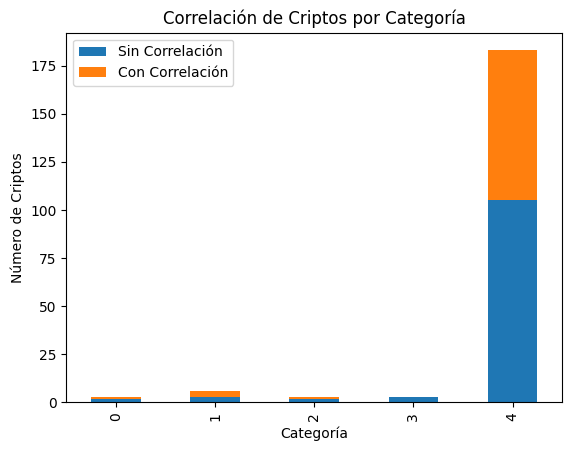

In [6]:
# Agrupar por categoría y calcular el número de criptos con y sin correlación
grouped = df.groupby('Clase')['correlacion'].value_counts().unstack(fill_value=0)

# Graficar
grouped.plot(kind='bar', stacked=True)
plt.title('Correlación de Criptos por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Número de Criptos')
plt.legend(['Sin Correlación', 'Con Correlación'])
plt.show()



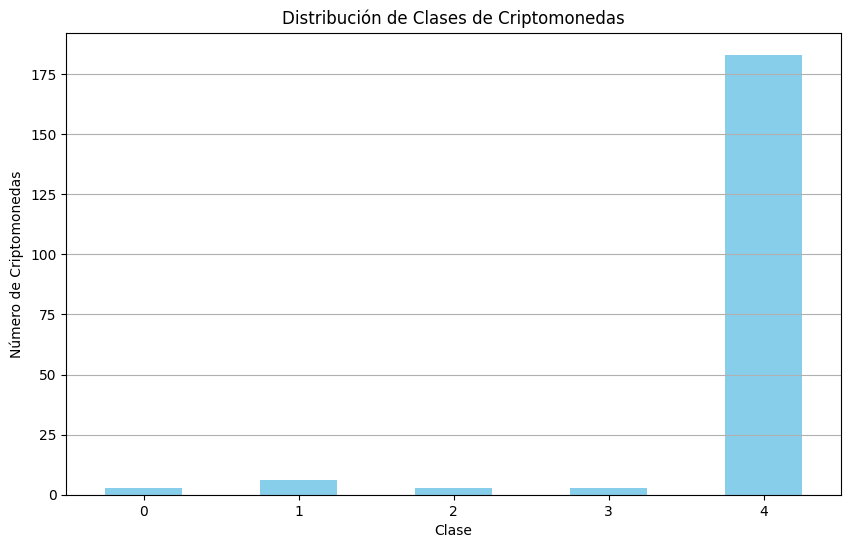

In [10]:
# Gráfico de barras para la distribución de clases
plt.figure(figsize=(10, 6))
df['Clase'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribución de Clases de Criptomonedas')
plt.xlabel('Clase')
plt.ylabel('Número de Criptomonedas')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()


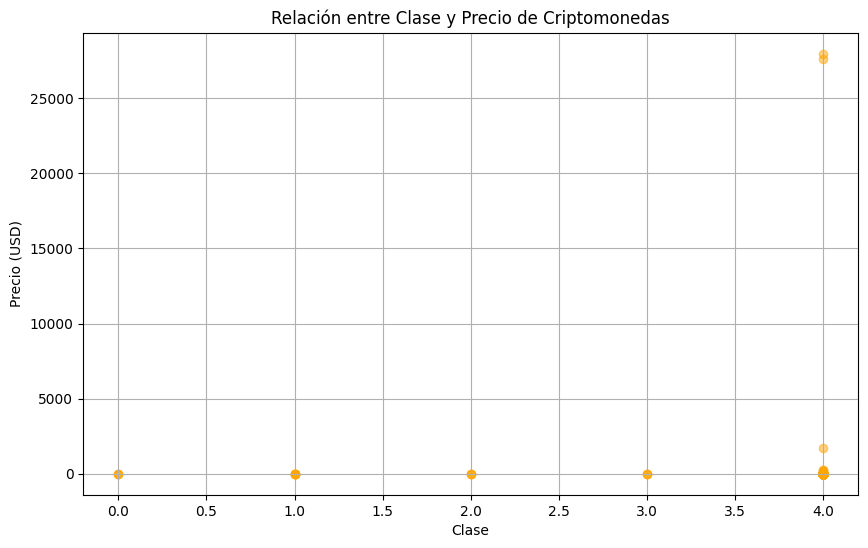

In [13]:
# Gráfico de dispersión para visualizar la relación entre la clase y el precio
plt.figure(figsize=(10, 6))
plt.scatter(df['Clase'], df['Price'], alpha=0.5, color='orange')
plt.title('Relación entre Clase y Precio de Criptomonedas')
plt.xlabel('Clase')
plt.ylabel('Precio (USD)')
plt.grid(True)
plt.show()

0.018343596239596572 1.0025118316315091


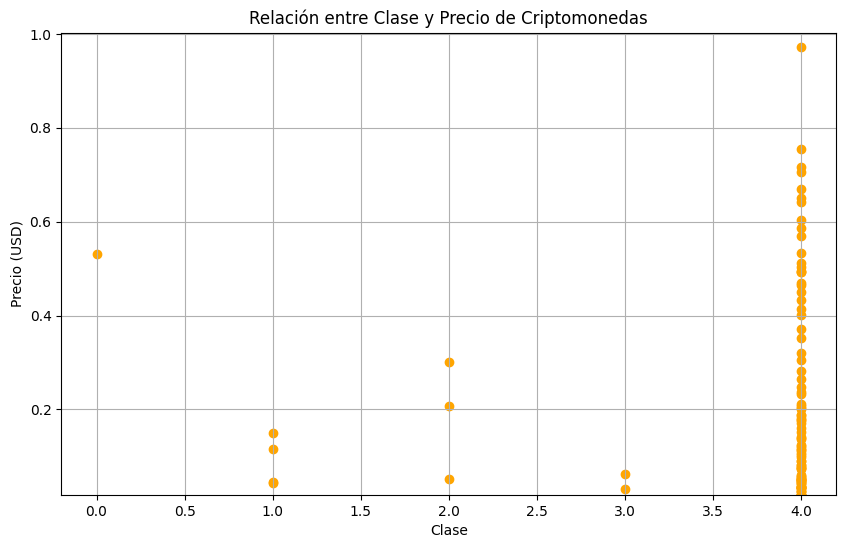

In [26]:
# Gráfico de dispersión para visualizar la relación entre la clase y el precio (centralizado)
plt.figure(figsize=(10, 6))
plt.scatter(df['Clase'], df['Price'], color='orange')
plt.title('Relación entre Clase y Precio de Criptomonedas')
plt.xlabel('Clase')
plt.ylabel('Precio (USD)')

# Calculamos el rango de mayor concentración de datos, entre primer y tercer cuartil
y_min = df['Price'].quantile(0.25)
y_max = df['Price'].quantile(0.75)
print(y_min, y_max)

plt.ylim(y_min, y_max)
plt.grid(True)
plt.show()

C:\Users\U S U A R I O\AppData\Local\Temp\ipykernel_7792\1047312529.py:19: FutureWarning: The provided callable <function mean at 0x00000188E4456C00> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_resampled = df.resample('D').agg({'tvl': np.mean, 'Market cap': np.mean, 'Price': np.mean})


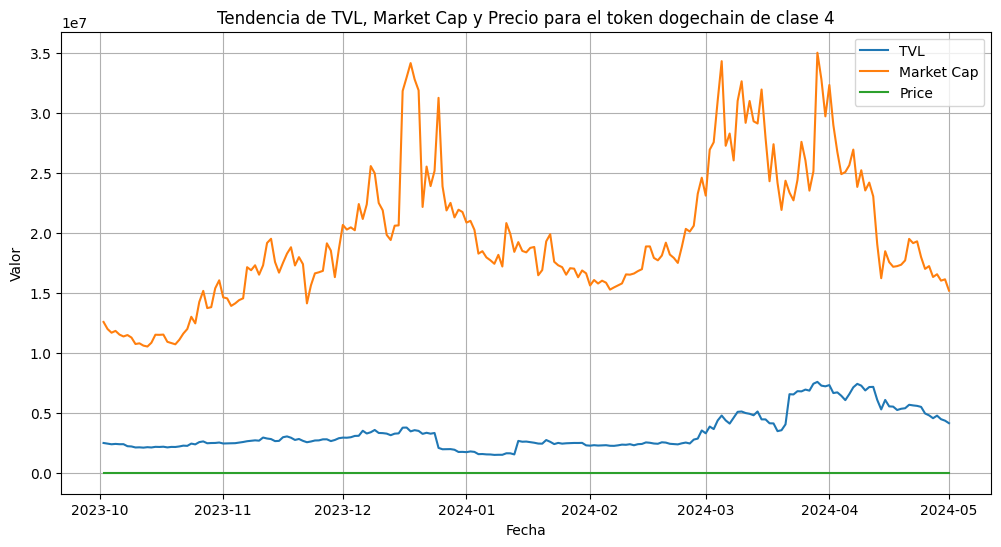

In [92]:
import numpy as np
import random
# Selecciona un token al azar
tokens = list(data.keys())
selected_token = random.choice(tokens)
clase_token = data[selected_token][0]['Clase']

# Filtra los datos para obtener solo las entradas correspondientes al token seleccionado
token_data = data[selected_token]

# Convierte los datos en un DataFrame de Pandas
df = pd.DataFrame(token_data)

# Ajusta las fechas a un formato de fecha y establece el índice del DataFrame como la fecha
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df.set_index('date', inplace=True)

# Agrupa los datos por períodos de tiempo (en este caso, días) y calcula las estadísticas relevantes
df_resampled = df.resample('D').agg({'tvl': np.mean, 'Market cap': np.mean, 'Price': np.mean})

# Grafica las tendencias de TVL, capitalización de mercado y precio a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled['tvl'], label='TVL')
plt.plot(df_resampled.index, df_resampled['Market cap'], label='Market Cap')
plt.plot(df_resampled.index, df_resampled['Price'], label='Price')
plt.title(f'Tendencia de TVL, Market Cap y Precio para el token {selected_token} de clase {clase_token}')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()